In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

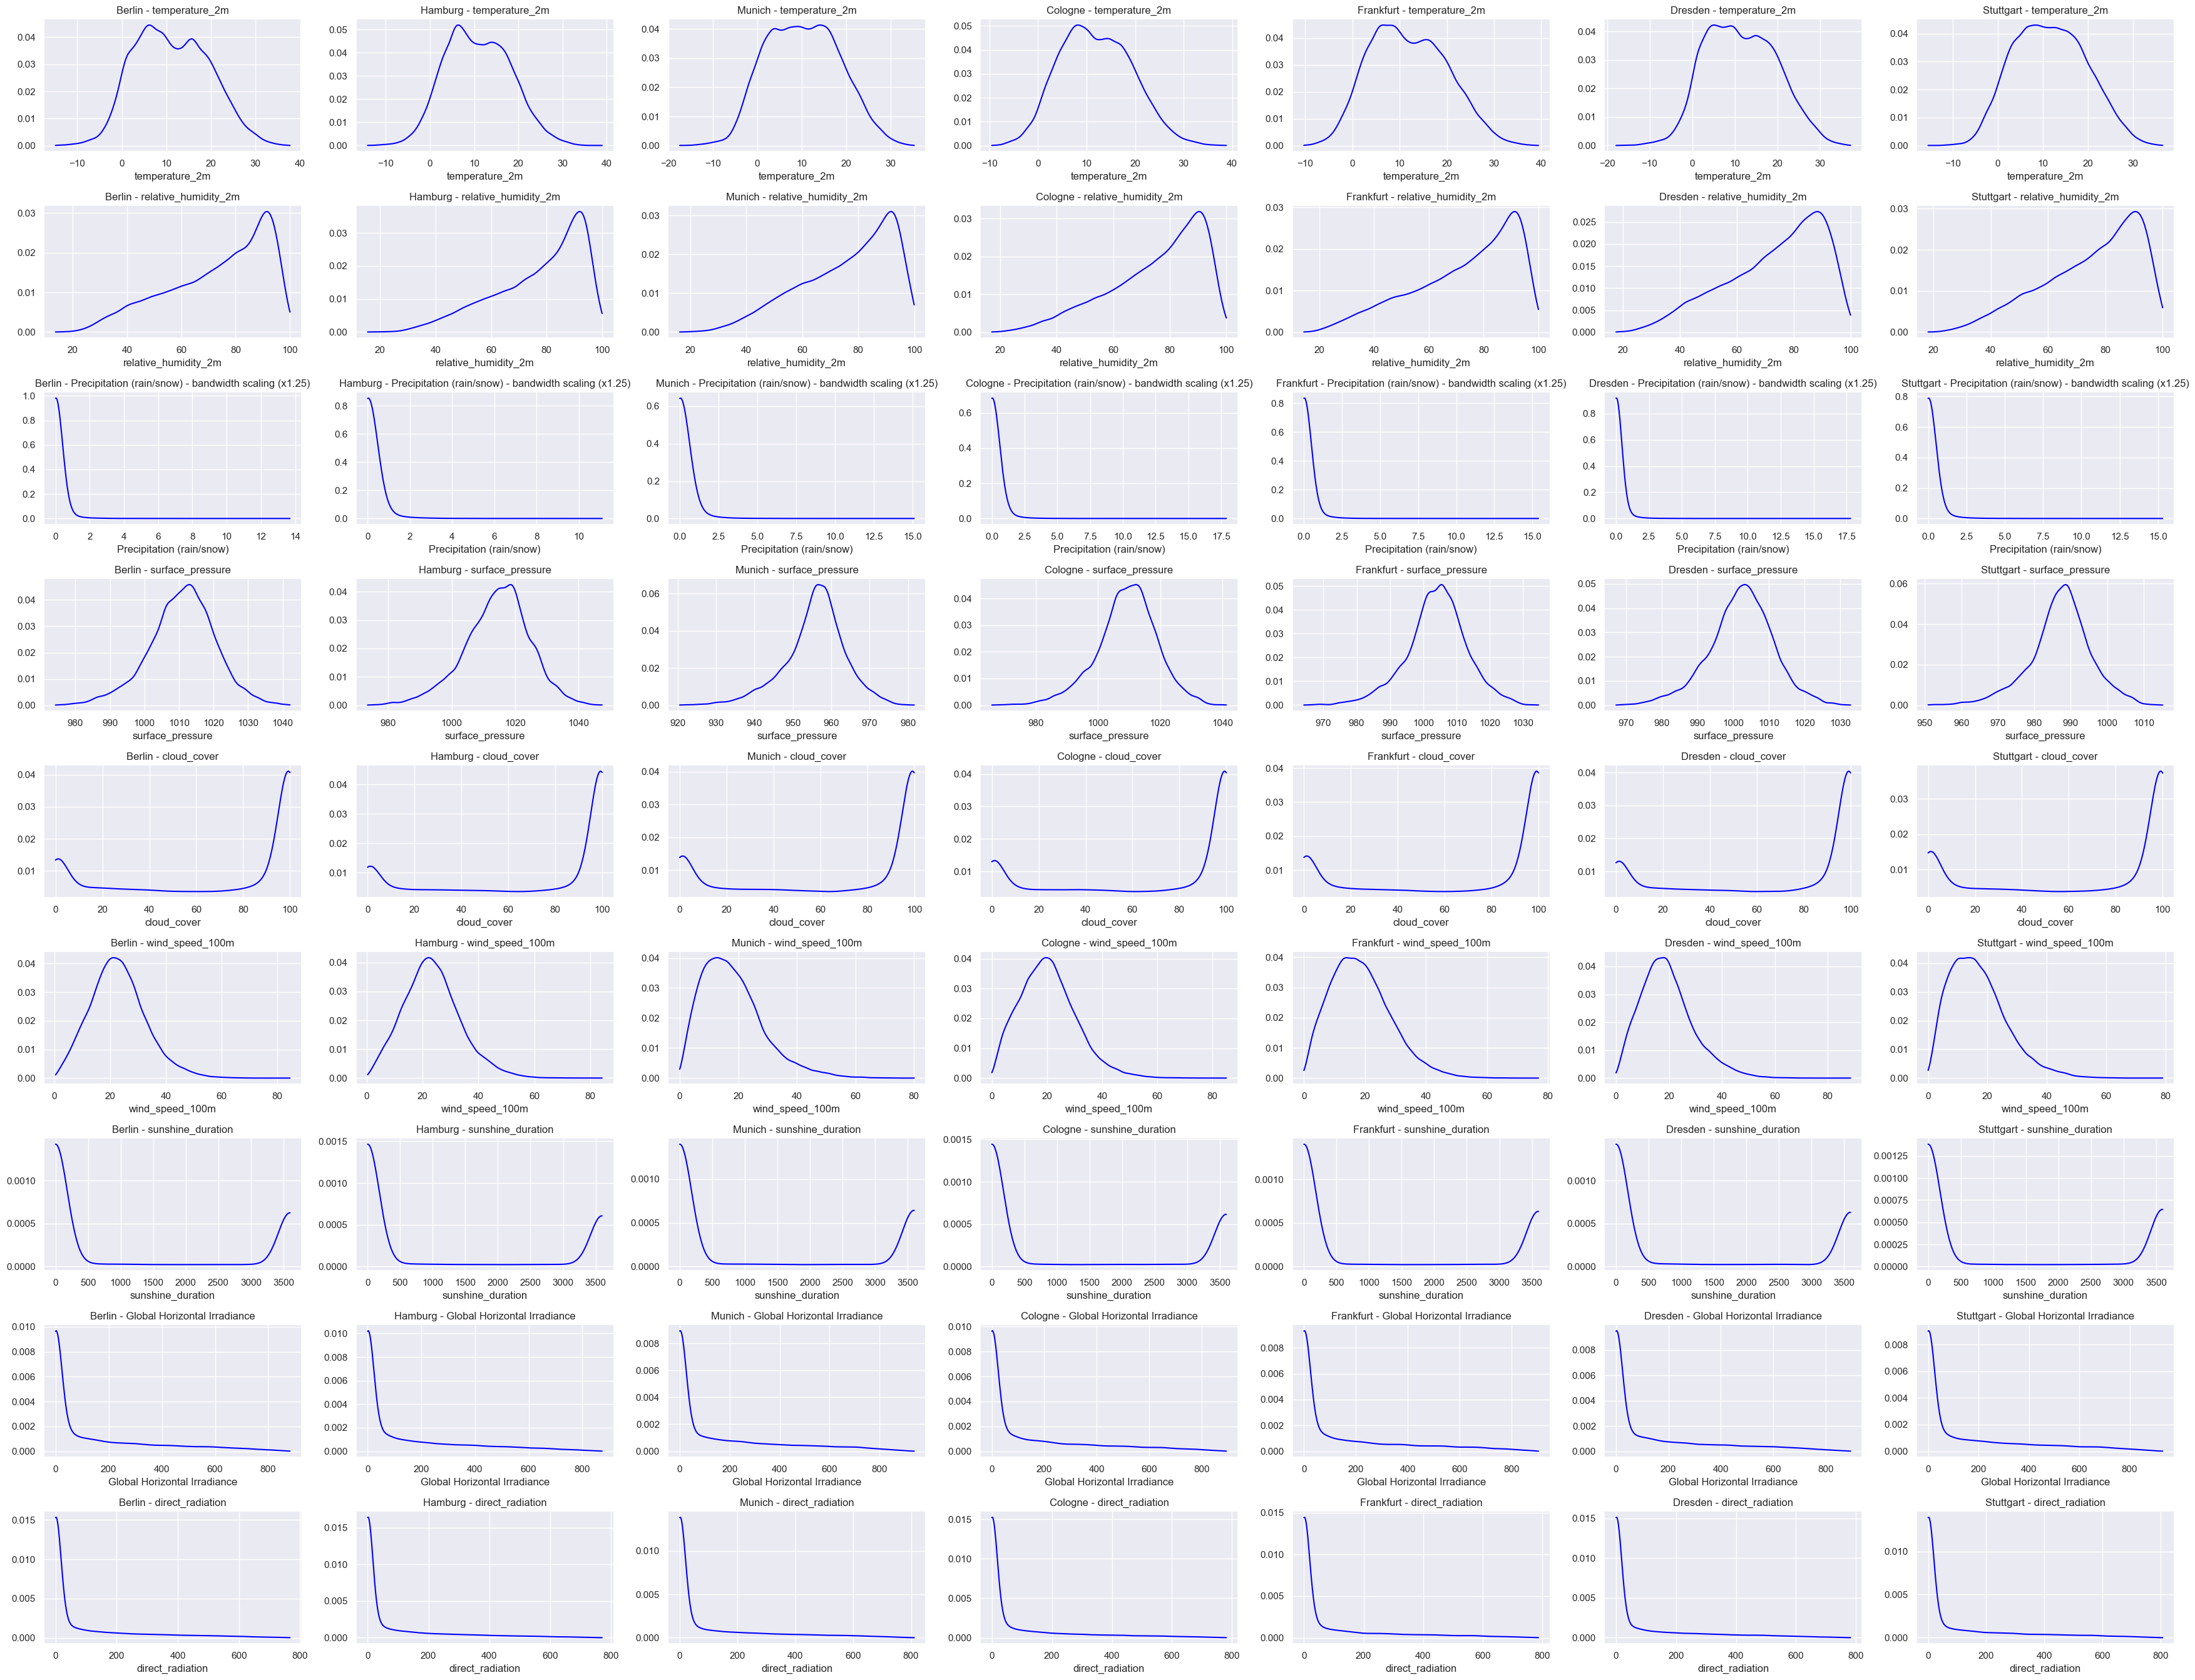

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  # Use seaborn style

# List of cities
cities = ["Berlin", "Hamburg", "Munich", "Cologne", "Frankfurt", "Dresden", "Stuttgart"]

dfs = []

# Load DataFrames
for city in cities:
    df = pd.read_csv(f"../../data/actual_weather_by_city/{city}.csv", delimiter=",")
    df = df.set_index("date")
    df = df.drop(columns=["idx"], errors="ignore")  # Ignore errors if 'idx' doesn't exist
    dfs.append(df)

# Setup grid dimensions
ncols = len(cities)
nrows = max(len(df.columns) for df in dfs)  # Rows based on max columns across all DataFrames
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 3))  # Adjust figsize

# Flatten axs for flexible iteration if nrows or ncols == 1
if nrows == 1 or ncols == 1:
    axs = axs.flatten()

# Plot density charts using matplotlib
import numpy as np
from scipy.stats import gaussian_kde

for i, (df, city) in enumerate(zip(dfs, cities)):
    for j, (col_name, data) in enumerate(df.items()):
        ax = axs[j, i] if nrows > 1 and ncols > 1 else axs[i + j]  # Handle indexing for axs
        
        # Filter out NaN values
        clean_data = data.dropna()
        
        # Compute density using Gaussian KDE
        density = gaussian_kde(clean_data, bw_method=1.25) if col_name == "Precipitation (rain/snow)" else gaussian_kde(clean_data)
        xs = np.linspace(clean_data.min(), clean_data.max(), 300)
        ax.plot(xs, density(xs), color="blue")  # Matplotlib density plot
        
        # Set title and labels
        ax.set_title(f"{city} - {col_name}") if not col_name == "Precipitation (rain/snow)" else ax.set_title(f"{city} - {col_name} - bandwidth scaling (x1.25)")
        ax.set_xlabel(col_name)


plt.tight_layout()
plt.show()


temperature_2m
relative_humidity_2m
Precipitation (rain/snow)
surface_pressure
cloud_cover
wind_speed_100m
sunshine_duration
Global Horizontal Irradiance
direct_radiation


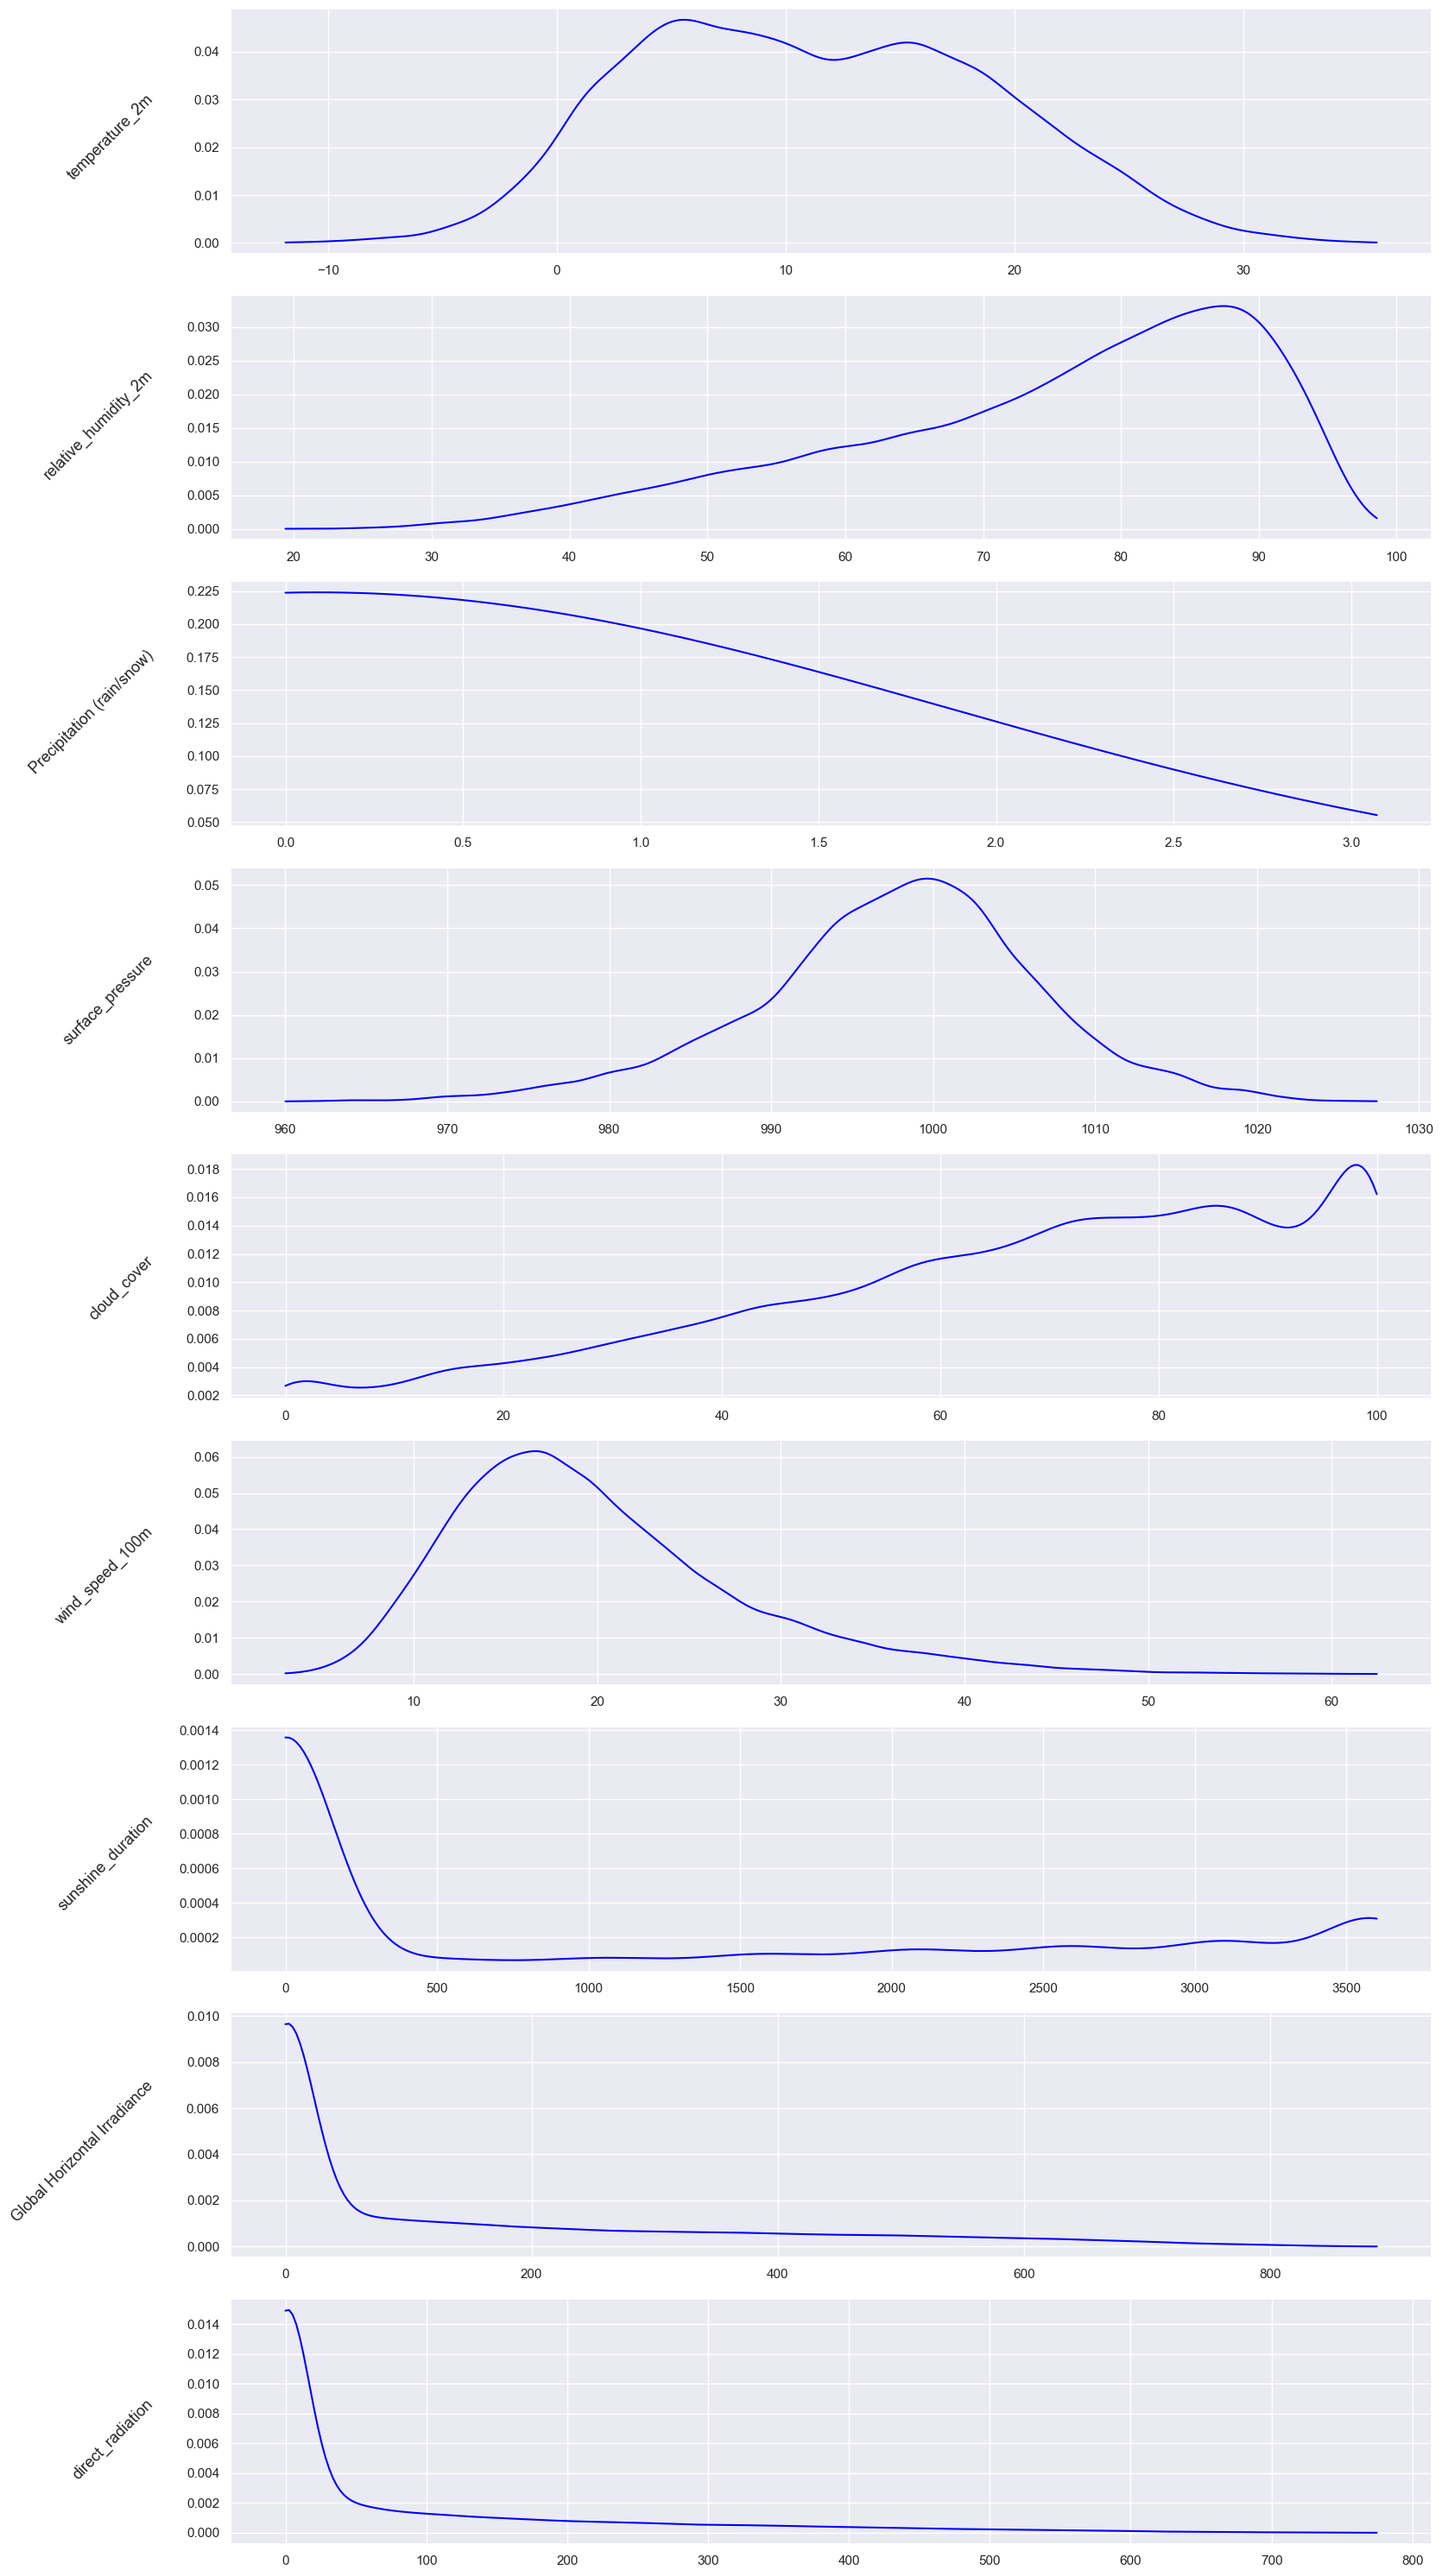

[count    60408.000000
mean        11.341238
std          7.728222
min        -11.867357
25%          5.232643
50%         10.882643
75%         17.139786
max         35.818356
Name: temperature_2m, dtype: float64, count    60408.000000
mean        74.808782
std         14.792628
min         19.379938
25%         65.294821
50%         78.295165
75%         86.615011
max         98.569940
Name: relative_humidity_2m, dtype: float64, count    60408.000000
mean         0.093539
std          0.177210
min          0.000000
25%          0.000000
50%          0.014286
75%          0.114286
max          3.071429
Name: Precipitation (rain/snow), dtype: float64, count    60408.000000
mean       997.683968
std          8.810347
min        960.009770
25%        992.633150
50%        998.283550
75%       1003.252787
max       1027.392700
Name: surface_pressure, dtype: float64, count    60408.000000
mean        65.408938
std         26.259910
min          0.000000
25%         47.714287
50%         70

In [59]:
rows = 9
fig, axs = plt.subplots(rows, figsize=(15, 30))
mean_weather_df = pd.read_csv(f"../../data/germany_weather_average.csv", delimiter=",")
mean_weather_df = mean_weather_df.set_index("date")
mean_weather_df = mean_weather_df.drop(columns=["idx"], errors="ignore")

describe = []
for i, (cols_name, data) in enumerate(mean_weather_df.items()):
    print(cols_name)
    describe.append(data.describe())
    density = gaussian_kde(data, bw_method=10) if cols_name == "Precipitation (rain/snow)" else gaussian_kde(data)
    xs = np.linspace(data.min(), data.max(), 300)
    axs[i].plot(xs, density(xs), color="blue")  # Matplotlib density plot
    
    y_pos = (rows - i - 0.5) / rows
    fig.text(0.0, y_pos, cols_name, ha='right', va='center', rotation=45, fontsize=13)
fig.tight_layout()
plt.show()
print(describe)